In [1]:
import os
os.chdir('../')
import os.path as op

import mne
import numpy as np
from mne.externals.h5io import read_hdf5

from scripts.config import meg_dir, rst_dir, subjects_dir, spacing

%matplotlib qt

In [2]:
# NOTE: change the name to the intended cluster result
clu_fname = op.join(rst_dir, 'aud_left_eq_vs_vis_left_eq_0_to_200.h5')

# prepare spatial adjency
fsaverage_src = mne.read_source_spaces(
    op.join(subjects_dir, 'fsaverage', 'bem', f'fsaverage-{spacing}-src.fif'))
fsaverage_vertices = [s['vertno'] for s in fsaverage_src]

# get info
info_data = mne.read_source_estimate(
    op.join(meg_dir, 'sample', f'sample_audvis-dSPM-{spacing}-inverse-morph-filt-sss-aud_left_eq'))
tstep = info_data.tstep

cluster_result = read_hdf5(clu_fname, title='mnepython')
clu = (cluster_result['t_obs'], cluster_result['clusters'],
       cluster_result['cluster_pv'], cluster_result['H0'])

os.environ["SUBJECTS_DIR"] = subjects_dir

In [3]:
stc_cluster = mne.stats.summarize_clusters_stc(
    clu,
    tstep=tstep * 1000,
    vertices=fsaverage_vertices,
    subject='fsaverage')

Becuase the difference was calculated as `difference = auditory - visual`, red blobs represent areas auditory > visual and blue blobs represent visual > auditory. Lateral and medial aspects of the brain were visualized.

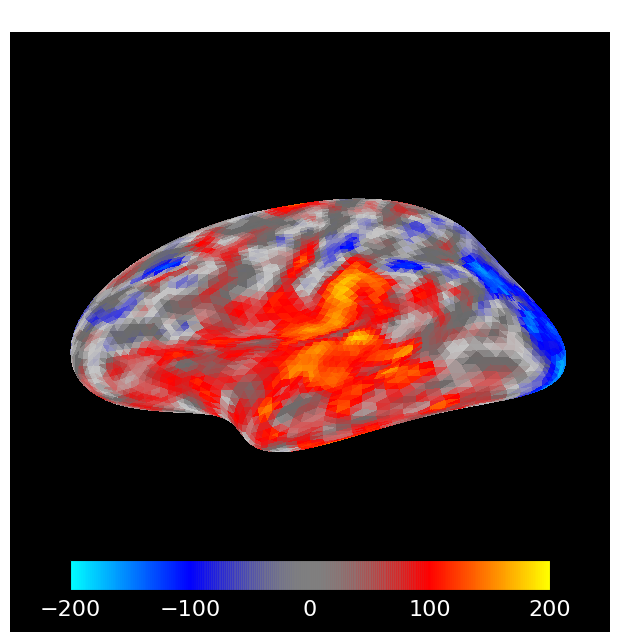

In [4]:
# lateral
stc_cluster.plot(hemi='lh', views='lat', time_label='temporal extent (ms)', size=(800, 800), clim=dict(kind='value', pos_lims=[0, 100, 200]),backend='matplotlib')  # matplotlib backend is only for notebook demonstration, use PySurfer (backend='auto') for interactive plotting.

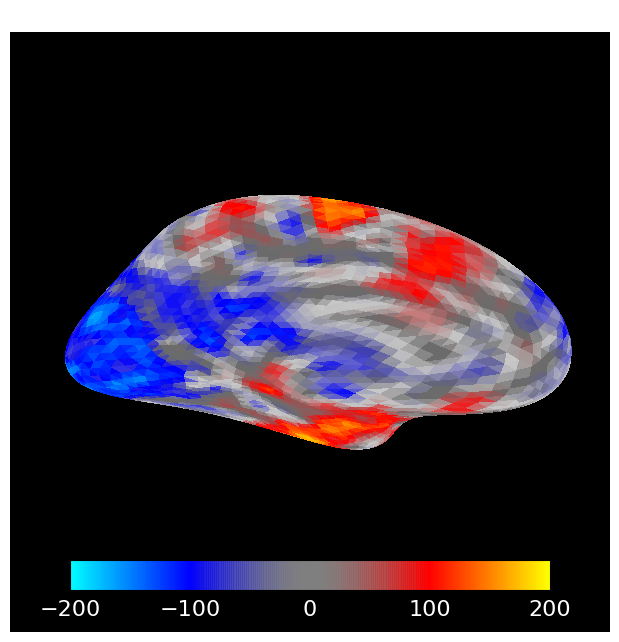

In [5]:
# medial
stc_cluster.plot(hemi='lh', views='med', time_label='temporal extent (ms)', size=(800, 800), clim=dict(kind='value', pos_lims=[0, 100, 200]), backend='matplotlib')  # matplotlib backend is only for notebook demonstration, use PySurfer (backend='auto') for interactive plotting.)

Notice that the clusters are broad since the noise was also amplified (because data from one subject was repeated 7 times).
It is obvious that temporal regions showed larger activation than occipital regions in the auditory condition (red). On the other hand, occipital regions showed larger activation than temporal regions in the visual condition (blue).